In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import joblib
import pandas as pd


In [10]:
import pandas as pd


file_path = r"D:\AIDS\3rd year\sem2\Bee Hive Condition Projecct\archive\Beehive-Health-Detection-System\bee_data_with_features.xlsx"


# Load the CSV file
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\n" + "="*50 + "\n")

# Display basic info about the dataset (data types, non-null counts)
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

# Check for missing values (count of NaN per column)
print("Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)
print("\n" + "="*50 + "\n")

# Percentage of missing values per column
print("Percentage of Missing Values per Column:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.round(2))  # Rounded to 2 decimal places
print("\n" + "="*50 + "\n")

# Check column data types and unique value counts (to spot potential errors)
print("Column Data Types and Unique Values:")
for column in df.columns:
    print(f"Column: {column}")
    print(f"  Data Type: {df[column].dtype}")
    print(f"  Unique Values: {df[column].nunique()}")
    # Display sample values (first 5 unique values) to inspect for errors
    print(f"  Sample Values: {df[column].dropna().unique()[:5]}")
    print("-"*30)

First 5 rows of the dataset:
   device  hive number            date  hive temp  hive humidity  \
0       1            5  6/10/2022 0:44      22.79          49.53   
1       1            5  6/10/2022 0:44      22.79          49.53   
2       1            5  6/10/2022 0:44      22.79          49.53   
3       1            5  6/10/2022 0:44      22.79          49.53   
4       1            5  6/10/2022 0:44      22.79          49.53   

   weather temp  weather humidity                                   file name  \
0         18.21                67  2022-06-10--00-44-04_1__segment0_part1.wav   
1         18.21                67  2022-06-10--00-44-04_1__segment0_part2.wav   
2         18.21                67  2022-06-10--00-44-04_1__segment0_part3.wav   
3         18.21                67  2022-06-10--00-44-04_1__segment0_part4.wav   
4         18.21                67  2022-06-10--00-44-04_1__segment0_part5.wav   

   queen presence  queen acceptance  ...     mfcc_4     mfcc_5     mfcc_6  

In [11]:
df_combined=df
# Select only MFCC features
all_features = df_combined[
    ["hive temp", "hive humidity", "weather temp", "weather humidity"] +
    [f"mfcc_{i}" for i in range(1, 14)]
]
# Remove any missing values
all_features = all_features.dropna()

# Fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_combined['anomaly'] = iso_forest.fit_predict(all_features)

# Anomalies are marked as -1, normal as 1
df_combined['anomaly_label'] = df_combined['anomaly'].map({1: "Normal", -1: "Anomaly"})

# Count anomalies
print(df_combined['anomaly_label'].value_counts())

anomaly_label
Normal     40470
Anomaly     2130
Name: count, dtype: int64


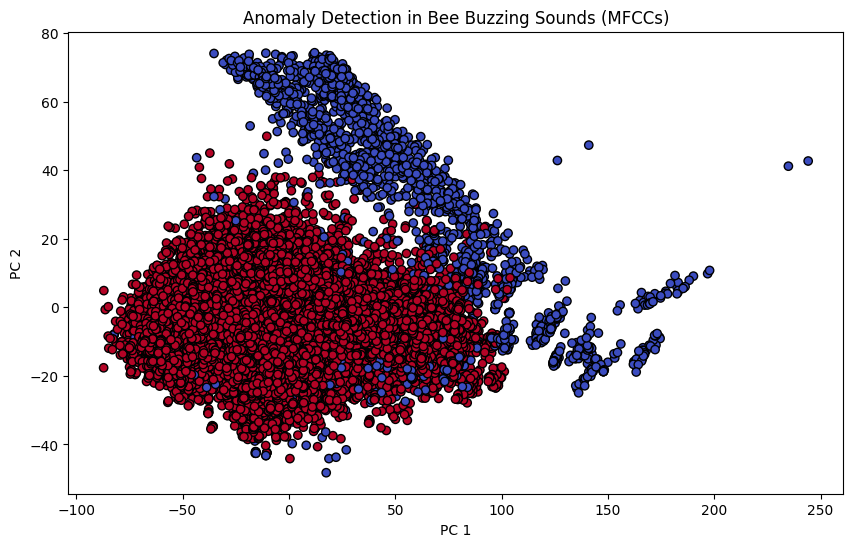

In [12]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(all_features)

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_combined['anomaly'], cmap='coolwarm', edgecolor='k')
plt.title('Anomaly Detection in Bee Buzzing Sounds (MFCCs)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [13]:
anomalous_files = df_combined[df_combined['anomaly_label'] == "Anomaly"]['file name'].tolist()
print("Anomalous Audio Files:", anomalous_files)


Anomalous Audio Files: ['2022-06-10--00-44-04_1__segment0_part1.wav', '2022-06-10--00-44-16_2__segment0_part1.wav', '2022-06-10--01-43-17_1__segment0_part1.wav', '2022-06-10--01-43-29_2__segment0_part1.wav', '2022-06-10--10-37-28_1__segment0_part1.wav', '2022-06-10--10-37-17_2__segment0_part1.wav', '2022-06-10--10-37-17_2__segment1_part4.wav', '2022-06-10--11-36-55_1__segment0_part1.wav', '2022-06-10--11-36-55_1__segment2_part5.wav', '2022-06-10--11-36-55_1__segment2_part6.wav', '2022-06-10--11-36-55_1__segment3_part1.wav', '2022-06-10--11-36-55_1__segment3_part2.wav', '2022-06-10--11-36-55_1__segment3_part4.wav', '2022-06-10--11-36-55_1__segment3_part5.wav', '2022-06-10--11-36-55_1__segment4_part1.wav', '2022-06-10--11-36-55_1__segment4_part2.wav', '2022-06-10--11-36-55_1__segment4_part3.wav', '2022-06-10--11-36-55_1__segment4_part4.wav', '2022-06-10--11-36-55_1__segment5_part1.wav', '2022-06-10--11-36-55_1__segment5_part2.wav', '2022-06-10--11-36-55_1__segment5_part3.wav', '2022-06-1

In [14]:
joblib.dump(iso_forest, 'bee_sound_anomaly_model.pkl')

['bee_sound_anomaly_model.pkl']